In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('/kaggle/input/ipl-2023-auction-dataset/IPL_Sold_players_2013_23.csv')
df.head(10)

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"
5,2023,Shaik Rasheed,Indian,Batter,Chennai Super Kings,"20,00,000"
6,2023,Ben Stokes,Overseas,All-Rounder,Chennai Super Kings,"16,25,00,000"
7,2023,Phil Salt,Overseas,Wicket-Keeper,Delhi Capitals,"2,00,00,000"
8,2023,Ishant Sharma,Indian,Bowler,Delhi Capitals,"50,00,000"
9,2023,Rilee Rossouw,Overseas,Batter,Delhi Capitals,"4,60,00,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       965 non-null    int64 
 1   Name         965 non-null    object
 2   Nationality  965 non-null    object
 3   Type         965 non-null    object
 4   Team         965 non-null    object
 5   Price        965 non-null    object
dtypes: int64(1), object(5)
memory usage: 45.4+ KB


**REMOVING COMMA (,) IN PRICE**

In [4]:
df['Price']=df['Price'].apply(lambda x: str(x).replace(',','')).astype('float')

**NO.OF UNIQUE VALUES**

In [5]:
for col in df.columns:
    print('No.of Unique values in',col,'are',df[col].nunique())

No.of Unique values in Season are 11
No.of Unique values in Name are 699
No.of Unique values in Nationality are 3
No.of Unique values in Type are 13
No.of Unique values in Team are 19
No.of Unique values in Price are 120


# **FEATURE ENGINEERING**

In [6]:
df['Type'].unique()

array(['Batter ', 'All-Rounder ', 'Bowler ', 'Wicket-Keeper ', 'Batsman ',
       'Wicket Keeper ', ' All-Rounder ', 'Bowler', ' Bowler ',
       ' Wicket Keeper', 'Batsman', 'All-Rounder', 'Wicket Keeper'],
      dtype=object)

**REPLACING DIFFERNT NAME TO UNIQUE NAMES**

In [7]:
df['Type']=df['Type'].apply(lambda x: x.replace('Batter ','Batsman'))
df['Type']=df['Type'].apply(lambda x: x.replace('Batsman ','Batsman'))
df['Type']=df['Type'].apply(lambda x: x.replace('All-Rounder ','All-Rounder'))
df['Type']=df['Type'].apply(lambda x: x.replace(' All-Rounder ','All-Rounder'))
df['Type']=df['Type'].apply(lambda x: x.replace(' All-Rounder','All-Rounder'))
df['Type']=df['Type'].apply(lambda x: x.replace('Bowler ','Bowler'))
df['Type']=df['Type'].apply(lambda x: x.replace(' Bowler ','Bowler'))
df['Type']=df['Type'].apply(lambda x: x.replace(' Bowler','Bowler'))
df['Type']=df['Type'].apply(lambda x: x.replace('Wicket-Keeper ','Wicket-Keeper'))
df['Type']=df['Type'].apply(lambda x: x.replace('Wicket Keeper ','Wicket-Keeper'))
df['Type']=df['Type'].apply(lambda x: x.replace(' Wicket Keeper','Wicket-Keeper'))
df['Type']=df['Type'].apply(lambda x: x.replace('Wicket Keeper','Wicket-Keeper'))

In [8]:
df['Type'].unique()

array(['Batsman', 'All-Rounder', 'Bowler', 'Wicket-Keeper'], dtype=object)

**NO DUPLICATED VALUES**

In [9]:
df.duplicated().sum()

0

In [10]:
df['Nationality'].value_counts()

Not Available    418
Indian           376
Overseas         171
Name: Nationality, dtype: int64

**418 VALUES RE NOT AVIALABLE WE CANNOT REPLCE WITH ANY OTHER VALUES SO,JUST KEEPING IT AS SAME AND IT IS NOT IDENTIFIED AS A NULL VALUE**

In [11]:
for col in df.columns:
    print('No.of Null values in',col,'are',df[col].isnull().sum() )

No.of Null values in Season are 0
No.of Null values in Name are 0
No.of Null values in Nationality are 0
No.of Null values in Type are 0
No.of Null values in Team are 0
No.of Null values in Price are 0


In [12]:
df.groupby('Nationality')['Price'].mean()

Nationality
Indian           1.982586e+07
Not Available    1.540175e+07
Overseas         3.418213e+07
Name: Price, dtype: float64

**OVERSEAS PLAYERS GETTING HIGH PAY COMPARED TOOUR INDIAN PLAYERS**

In [13]:
df['Nationality']=df['Nationality'].apply(lambda x:'na' if "Not Available" in x else x)

# DATA VISUALISATION****

**SWARMPLOT IS LIKE SCATTER PLOT SO, WE CAN OBSERVE HOW DATA POINTS ARE DISTRIBUTED**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Nationality', ylabel='Price'>

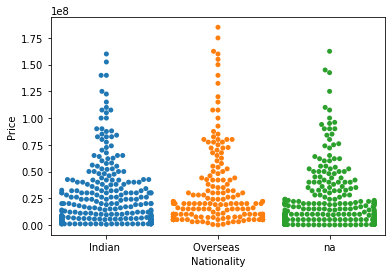

In [14]:
sns.swarmplot(x="Nationality", y="Price", data=df)

In [15]:
df=df.sort_values(by='Price',ascending=False)
df.head(10)

,Season,Name,Nationality,Type,Team,Price
49,2023,Sam Curran,Overseas,All-Rounder,Punjab Kings,185000000.0
40,2023,Cameron Green,Overseas,All-Rounder,Mumbai Indians,175000000.0
316,2021,Christopher Morris,na,All-Rounder,Rajasthan Royals,162500000.0
6,2023,Ben Stokes,Overseas,All-Rounder,Chennai Super Kings,162500000.0
735,2015,Yuvraj Singh,Indian,Batsman,Delhi Daredevils,160000000.0
28,2023,Nicholas Pooran,Overseas,Wicket-Keeper,Lucknow Super Giants,160000000.0
352,2020,Pat Cummins,Overseas,All-Rounder,Kolkata Knight Riders,155000000.0
180,2022,Ishan Kishan,Indian,Wicket-Keeper,Mumbai Indians,152500000.0
324,2021,Kyle Jamieson,Overseas,All-Rounder,Royal Challengers Bangalore,150000000.0
633,2017,Benjamin Stokes,na,All-Rounder,Rising Pune Supergiant,145000000.0


**THESE ARE THE TOP 10 PAID PLAYERS IN IPL**

**SAM CURRAN IS THE HIGHEST PAID PLAYER IN IPL HISTORY FROM 2013 TO 2023**

In [16]:
df.groupby('Type')['Price'].mean()

Type
All-Rounder      2.144731e+07
Batsman          2.172529e+07
Bowler           1.851826e+07
Wicket-Keeper    2.147958e+07
Name: Price, dtype: float64

**WICKET KEEPERS AND ALL ROUNDERS ARE GETTING NEARLY EQUAL AMOUNT OF AVERAGE PAY of 2 CRORES**

In [17]:
top_10_paid=(df.groupby('Name')['Price'].mean().sort_values(ascending=False)).head(10)
top_10_paid

Name
Sam Curran             185000000.0
Cameron Green          175000000.0
Christopher Morris     162500000.0
Ben Stokes             162500000.0
Ishan Kishan           152500000.0
Glenn Maxwell          142500000.0
Deepak Chahar          140000000.0
Benjamin Stokes        135000000.0
Nicholas Pooran        133750000.0
Harry Brook            132500000.0
Name: Price, dtype: float64

In [18]:
fig=px.bar(x=top_10_paid.index,
           y= top_10_paid.values,
           color= top_10_paid.index,
           text= top_10_paid.values,
           title=' Top_paid_Cricketers')
fig.update_layout(xaxis_title='Players',yaxis_title='Amount')

In [19]:
features=['Name','Nationality','Type','Team']
for feature in features:
    Continents_population=df.groupby(by=feature)['Price'].mean().sort_values(ascending=False).head(7)
    fig=px.bar(x=Continents_population.index,
           y=Continents_population.values,
           color=Continents_population,
           text=Continents_population.values,
           color_discrete_sequence=px.colors.sequential.PuBu,
          template='plotly_dark')
    fig.update_layout(xaxis_title=feature,yaxis_title='Payment paid')
    fig.show()

**WE CAN ANALSE**

**1)FOREIGN PLAYERS PAID HIGH COMPARED TO INDIAN PLAYERS**
  
  **2)BOWLERS ARE GETTING LOW PAY COMPARING TO REMAINING**
  
  **3)PUNJAB KINGS UTILISED MOST OF IT'S MONEY ON PLAYERS**

In [20]:
lowest_paid_players=(df.groupby('Name')['Price'].mean().sort_values(ascending=True)).head(10)
lowest_paid_players

Name
Kusal Janith Perera      20000.0
Ryan McLaren             50000.0
Jacob Oram               50000.0
Jeevan Mendis            50000.0
Christopher Barnwell     50000.0
Clinton McKay           100000.0
Philip Hughes           100000.0
Nathan McCullum         100000.0
Sudeep Tyagi            100000.0
Pankaj Singh            150000.0
Name: Price, dtype: float64

In [21]:
fig=px.bar(x=lowest_paid_players.index,
           y= lowest_paid_players.values,
           color= lowest_paid_players.index,
           text= lowest_paid_players.values,
           title=' lowest_paid_players')
fig.update_layout(xaxis_title='Players',yaxis_title='Amount')

**ABOVE ARE THE LOWEST PAID PLAYERS**